# Введение в анализ данных
## Домашнее задание 2. `Pandas` и `Seaborn`


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 4 балла
* Задача 2 -- 2 балла

Сложная часть (необходимо на "отл"):

* Задача 3 -- 5 баллов
* Задача 4 -- 3 балла
* Задача 5 -- 8 баллов

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

## Легкая часть

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие.

Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv`

Описание данных:

* `school` -- номер школы;
* `test_score` -- результат одного ученика из этой школы;
* `number_of_students` -- кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

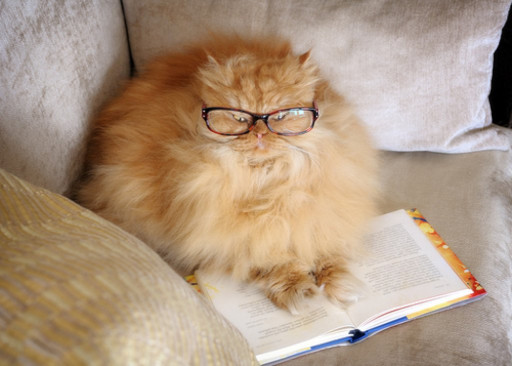

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

Это можно сделать с помощью методов  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [72]:
exam_data = pd.read_csv('./Данные к ДЗ 2/cat_exam_data.csv')
exam_data.head(5)

school  test_score  number_of_students
0      26        39.0                 965
1      54        64.0                1483
2     356        64.0                1055
3     108        68.0                1806
4     298        78.0                 971

Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [73]:
exam_data.isna().sum()

school                  0
test_score            204
number_of_students      0
dtype: int64

Очистим данные

In [74]:
exam_data = exam_data.dropna()
exam_data.isna().sum()

school                0
test_score            0
number_of_students    0
dtype: int64

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции:

In [75]:
exam_data.describe()

school     test_score  number_of_students
count  501358.000000  501358.000000       501358.000000
mean      250.096795      51.681788         1088.910569
std       144.428420      14.179981          281.016801
min         0.000000      -0.000000          156.000000
25%       125.000000      42.000000          890.000000
50%       250.000000      52.000000         1079.000000
75%       377.000000      61.000000         1285.000000
max       499.000000     100.000000         1806.000000

Посчитайте сколько котиков получили 100 баллов:

In [76]:
len(exam_data[exam_data['test_score'] == 100])

51

Выведите информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.

Отсортируйте эти школы по количеству стобалльников.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [77]:
counter = exam_data[exam_data['test_score'] == 100].\
    groupby(['school', 'number_of_students'], as_index=False).\
    count().sort_values(by='test_score', ascending=False)

counter.head()

school  number_of_students  test_score
48     486                 800           2
0        4                1015           1
37     395                 436           1
27     302                1517           1
28     303                 701           1

Посчитайте средний результат каждой из школ и посмотрите на результат:

Может помочь метод <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [78]:
mean_val = exam_data.groupby(['school', 'number_of_students'], as_index=False).mean()
mean_val.head()

school  number_of_students  test_score
0       0                 418   52.294258
1       1                1209   52.028950
2       2                1035   51.751451
3       3                1245   51.566265
4       4                1015   51.025641

Отсортируйте школы по среднему результату:

In [79]:
mean_val = mean_val.sort_values('test_score', ascending=False)

Посмотрите на топ 10 лучших результатов:

In [80]:
mean_val.iloc[:10]

school  number_of_students  test_score
57       57                 560   53.341682
124     124                 598   52.993311
263     263                 669   52.982063
82       82                 555   52.981982
366     366                 773   52.970207
465     465                1179   52.957555
169     169                 858   52.932401
449     449                 357   52.910364
477     477                 808   52.898515
464     464                 431   52.865429

**Вывод:** Среднее числинность "топовых" школ сильно колеблется. Не видно какой-либо зависимости.


Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим.

Посмотрите теперь на 10 худших школ:

In [81]:
mean_val.iloc[-10:]

school  number_of_students  test_score
383     383                 636   50.716981
264     264                 929   50.702906
48       48                 649   50.690293
156     156                1093   50.641354
394     394                1079   50.461538
194     194                 774   50.406977
471     471                 960   50.362500
486     486                 800   50.325000
211     211                 351   50.248571
353     353                 336   50.050595

**Вывод:** это не так. Видно, что размер "худших" школ не сильно отличен от размера "лучших".

Постройте график зависимости среднего результата ЕКЭ от количества учеников:

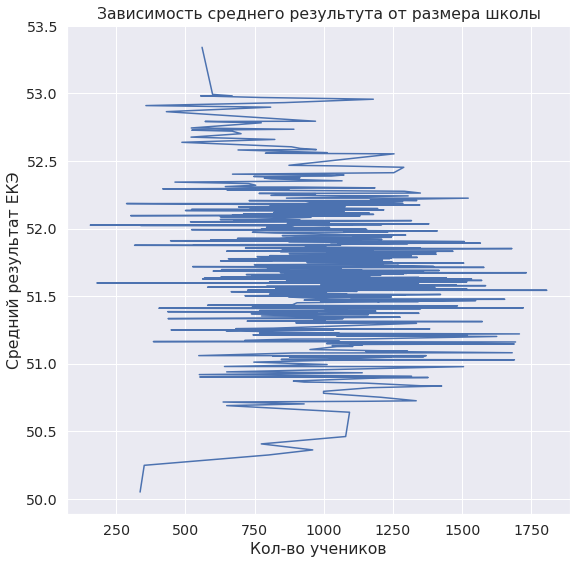

In [82]:
plt.figure(figsize=(9, 9))
plt.plot(mean_val.number_of_students, mean_val.test_score)

plt.xlabel('Кол-во учеников')
plt.ylabel('Средний результат ЕКЭ')
plt.title('Зависимость среднего результута от размера школы')
plt.show()

**Вывод:** нету зависимости между размером школы и средним баллом.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы (<= 1000 учеников == маленькая школа):

In [84]:
exam_data['is_big_school'] = exam_data['number_of_students'] > 1000
mean_val = exam_data.groupby(['school', 'number_of_students', 'is_big_school'], as_index=False).mean()

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` --- число бинов гистограммы;
* `alpha=0.5` --- прозрачность бинов.

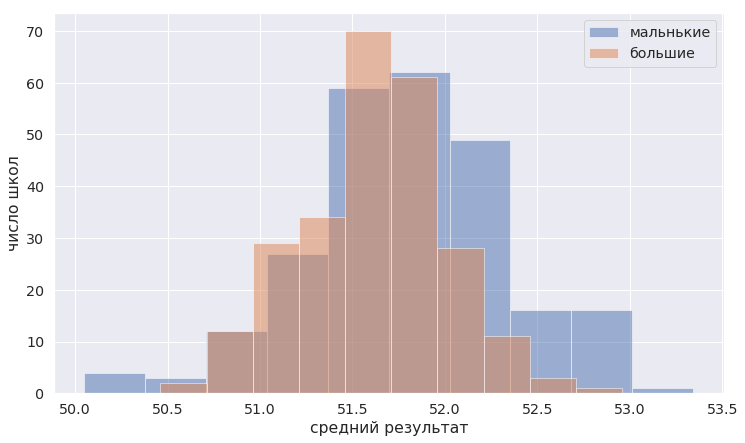

In [85]:
plt.figure(figsize=(12, 7))
plt.hist(mean_val[mean_val['is_big_school']==False]['test_score'], bins=10, alpha=0.5, label='мальнькие')
plt.hist(mean_val[mean_val['is_big_school']==True]['test_score'], bins=10, alpha=0.5, label='большие')
plt.legend()
plt.xlabel('средний результат')
plt.ylabel('число школ')
plt.show()

**Вывод:** Видно, что маленьких школ с более высоким средним баллом больше.

---

### Задача 2

Задача заключается в работе с данными о трендах на YouTube. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

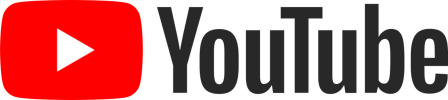


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

In [15]:
youtube_data = pd.read_csv('Данные к ДЗ 2/RUvideos_short.csv')
youtube_data.head()

video_id trending_date                                  title  \
0  gDuslQ9avLc      17.14.11        Захар и Полина учатся экономить   
1  AOCJIFEA_jE      17.14.11       Биржа Мемов #29. Большой выпуск   
2  VAWNQDgwwOM      17.14.11           ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ   
3  gknkFwKQfHg      17.14.11             Сочная кесадилья с курицей   
4  3sYvZcwzZr8      17.14.11  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ   

  channel_title  category_id              publish_time  \
0     Т—Ж БОГАЧ           22  2017-11-13T09:09:31.000Z   
1  Druzhko Show           22  2017-11-13T17:32:11.000Z   
2          Юлик           24  2017-11-13T16:11:31.000Z   
3      Hochland           22  2017-11-13T06:51:10.000Z   
4      Совергон           24  2017-11-13T16:52:36.000Z   

                                                tags   views  likes  dislikes  \
0  захар и полина|"учимся экономить"|"копить день...   62408    334       190   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841      2244   
2  юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...  424596  49854       714   
3  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566       122   
4  Совергон|"Sovergon"|"клипы"|"родители"|"школа"...  243469  36216       631   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2           2944  https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg   
3             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
4           1692  https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Знакомьтесь, это Захар и Полина. Вместе с ними...  
1  В 29 выпуске Дружко Шоу Сергей сказал, что Бир...  
2  http://kapitany.ru/!Yulik.cap - Факультет #Кап...  
3            *** как готовить ресторанные блюда дома  
4  ❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...

В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` -- дата в формате год-день-месяц;
* `category_id` -- категория видео, названия приведены в файле `RU_category_id.json`;
* `views` -- количество просмотров видео;
* `likes` -- количество лайков;
* `dislikes` -- количество дислайков;
* `comment_count` -- количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у даты. Напечатайте начало таблицы.

In [16]:
youtube_data = youtube_data[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
youtube_data['trending_date'] = pd.to_datetime(youtube_data['trending_date'], format='%y.%d.%m').dt.day
youtube_data.head()

trending_date  category_id   views  likes  dislikes  comment_count
0             14           22   62408    334       190             50
1             14           22  330043  43841      2244           2977
2             14           24  424596  49854       714           2944
3             14           22  112851   3566       122             80
4             14           24  243469  36216       631           1692

<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

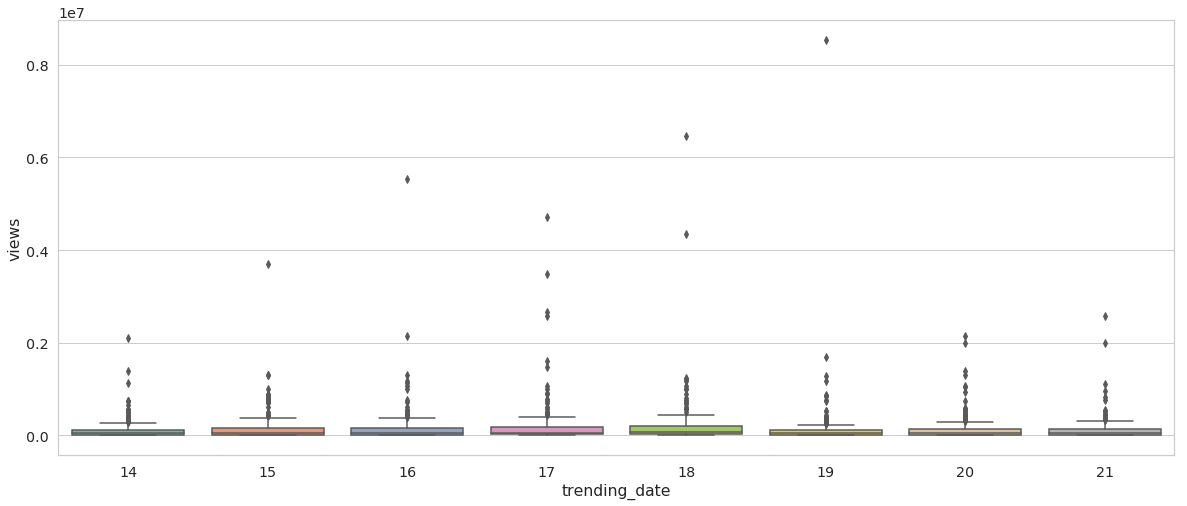

In [17]:
plt.figure(figsize=(20, 8))
sns.boxplot(x ='trending_date', y = 'views', data=youtube_data, palette='Set2');

Исправьте этот недостаток, установив некоторое значение. 

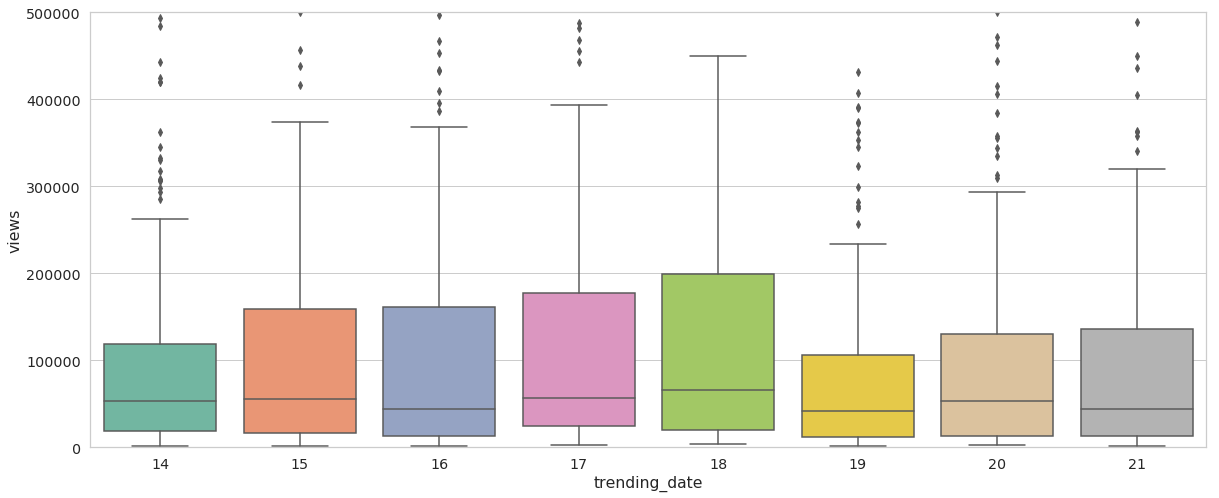

In [18]:
plt.figure(figsize=(20, 8))
plt.ylim(0, 5e5)
sns.boxplot(x ='trending_date', y = 'views', data=youtube_data, palette='Set2');

Постройте jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

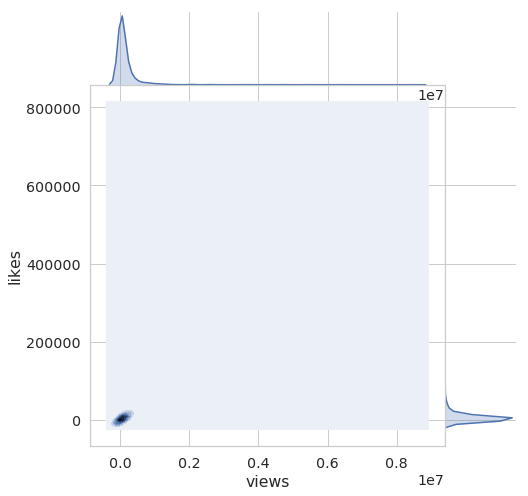

In [19]:
sns.jointplot(x = 'views', y = 'likes', data=youtube_data, kind='kde', height=7, space=0);

Исправьте этот недостаток.

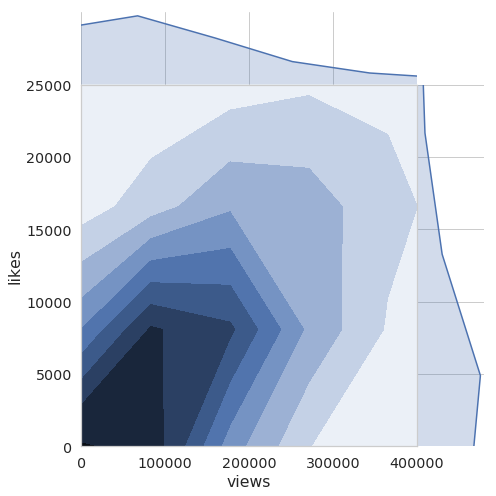

In [20]:
sns.jointplot(
    x = 'views', 
    y = 'likes', 
    data = youtube_data, 
    kind='kde', height=7, 
    space=0, 
    ylim=(0,25000), 
    xlim=(0,400000)
)
plt.show()

**Так и не понял, почему данные на графике смещены. Ниже проверка, что отрицательных значений нет!**

In [86]:
print(len(youtube_data[youtube_data['views'] < 0]))
print(len(youtube_data[youtube_data['likes'] < 0]))

0
0



---
## Сложная часть

### Задача 3

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


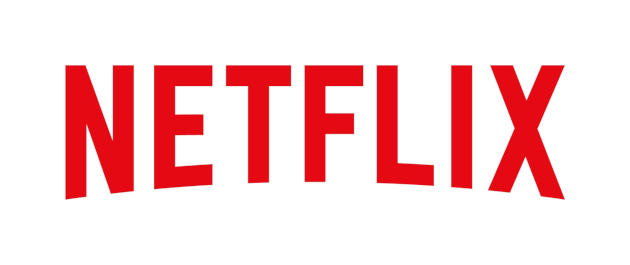

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.


Загрузите данные, выполнив код ниже.

In [21]:
# код ниже менять нельзя (кроме пути до данных), просто запустите ячейку!
data = pd.read_csv('./Данные к ДЗ 2/netflix_data.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [22]:
data.head()

title rating  \
0           White Chicks  PG-13   
1    Lucky Number Slevin      R   
2         Grey's Anatomy  TV-14   
3           Prison Break  TV-14   
4  How I Met Your Mother  TV-PG   

                                         ratingLevel  release year  \
0  crude and sexual humor, language and some drug...          2004   
1  strong violence, sexual content and adult lang...          2006   
2  Parents strongly cautioned. May be unsuitable ...          2016   
3  Parents strongly cautioned. May be unsuitable ...          2008   
4  Parental guidance suggested. May not be suitab...          2014   

   user rating score  
0               82.0  
1                NaN  
2               98.0  
3               98.0  
4               94.0

Удалите из данных дупликаты. Сколько объектов удалено?

In [23]:
prev_size = len(data)
data = data.drop_duplicates()
clear_size = len(data)
print(prev_size - clear_size)

500


Сколько объектов осталось?

In [24]:
data.shape

(500, 5)

Сколько рейтинговых групп представлено в данных?

In [25]:
len(np.unique(data['rating']))

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

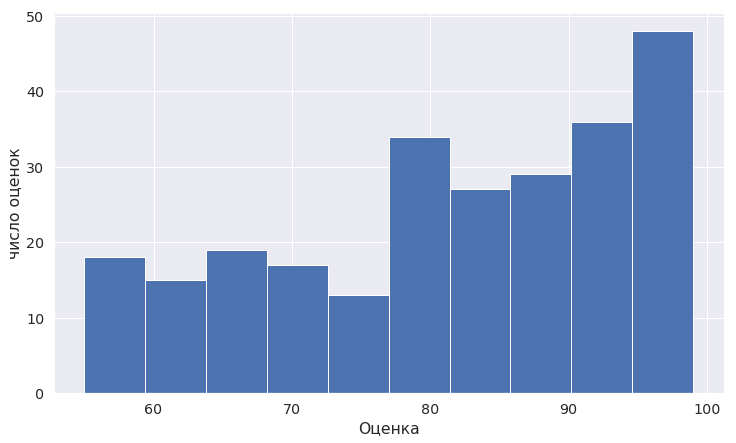

In [92]:
plt.figure(figsize=(12, 7))
plt.hist(data['user rating score'])
plt.xlabel('Оценка')
plt.ylabel('число оценок')
plt.show()

**Вывод:** пользователи предпочитают шоу с высоким рейтингом.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [27]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

**Ответ:** 
* Да, медиана и среднее отличаются. 
* Да, могут. В качестве примера можно взять оценки 10, 90, 90. Среднее равно 63, медиана равна 90. 
* Потому что в общем случае нет никакой зависимости.

В какие годы были запущены шоу, представленные в датасете?

In [28]:
np.unique(data['release year'].to_numpy())

array([1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

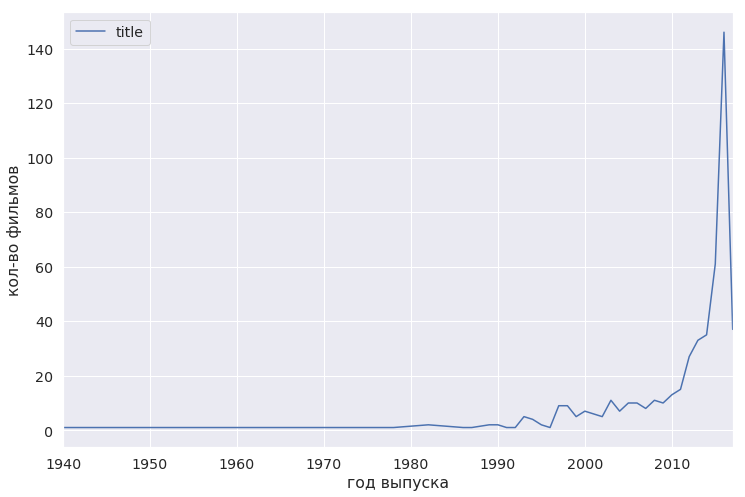

In [103]:
data.groupby(by='release year', as_index=False).count().plot(x='release year', y='title', figsize=(12,8))
plt.xlabel('год выпуска')
plt.ylabel('кол-во фильмов')
plt.show()

**Вывод:** Да, рост есть. Возможно, выброс был в 2016 году. Трудно говорить, так как мы не видим дальнейшей тенденции роста. 

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [30]:
data.groupby(by='release year', as_index=False).mean()

release year  user rating score
0           1940          61.000000
1           1976                NaN
2           1978          86.000000
3           1982          68.000000
4           1986          67.000000
5           1987          58.000000
6           1989          80.000000
7           1990          65.000000
8           1991                NaN
9           1992          70.000000
10          1993          87.000000
11          1994          80.000000
12          1995          69.000000
13          1996                NaN
14          1997          80.800000
15          1998          79.000000
16          1999          78.250000
17          2000          85.000000
18          2001          87.000000
19          2002          90.500000
20          2003          72.600000
21          2004          83.000000
22          2005          88.142857
23          2006          69.285714
24          2007          73.200000
25          2008          79.833333
26          2009          75.000000
27          2010          78.333333
28          2011          89.000000
29          2012          79.437500
30          2013          76.909091
31          2014          74.916667
32          2015          82.750000
33          2016          84.313953
34          2017          88.125000

**Вывод:** Наверное, нет. Так число фильмов выпущенных в 2017 значительно меньше.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

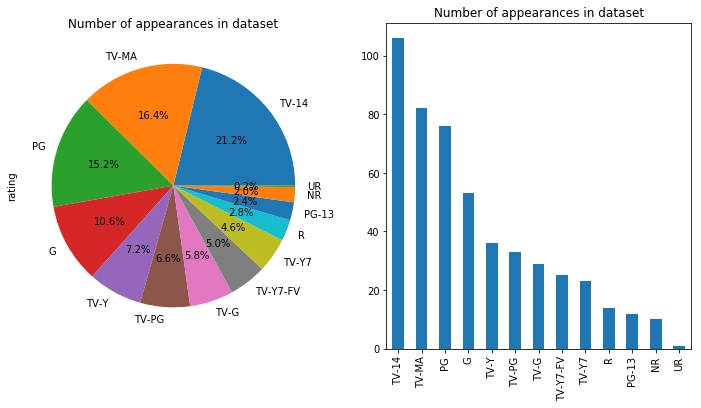

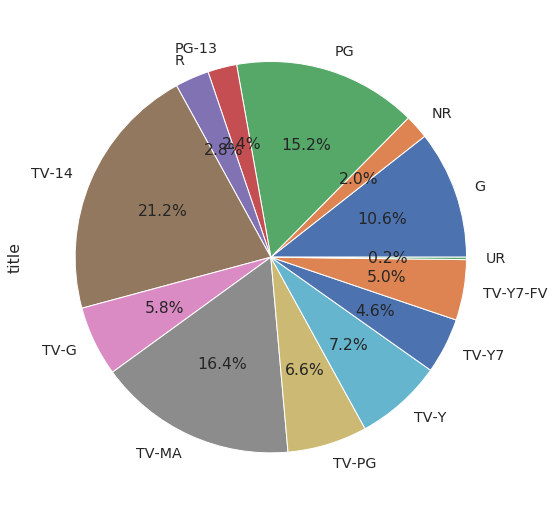

In [102]:
data.groupby(by='rating').count().plot.pie(y='title', figsize=(9, 9), legend=False, autopct='%1.1f%%')
plt.show()

**Вывод:** Наибольшее число шоу выходит с рейтингом TV-14, TV-MA, PG.

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится (либо используйте `scipy.stats.randint`). Обозначим это шоу N.
Ответьте на следующие вопросы:  
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [32]:
data.sort_values(by='user rating score', ascending=False)[:13]
show = data.iloc[8]
show

title                                                 The Walking Dead
rating                                                           TV-MA
ratingLevel          For mature audiences.  May not be suitable for...
release year                                                      2015
user rating score                                                   98
Name: 8, dtype: object

Худшее шоу, выпущенное в один год с The Walking Dead.

In [33]:
data[data['rating'] == show['rating']].sort_values(by='user rating score')[:1]

title rating                                        ratingLevel  \
380  Bitten  TV-MA  For mature audiences.  May not be suitable for...   

     release year  user rating score  
380          2016               56.0

Кол-во шоу, выпущенных в одном году с TWD.

In [34]:
len(data[data['release year'] == show['release year']])

61

Изменение средней оценки в году при отмене выхода TWD.

In [35]:
print(-data[data['release year'] == show['release year']]['user rating score'].mean() +
 data[(data['release year'] == show['release year']) &
      (data['title'] != show['title'])]['user rating score'].mean()) 


-0.49193548387096087


Ответьте на следующие вопросы при помощи `boxplot`:
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

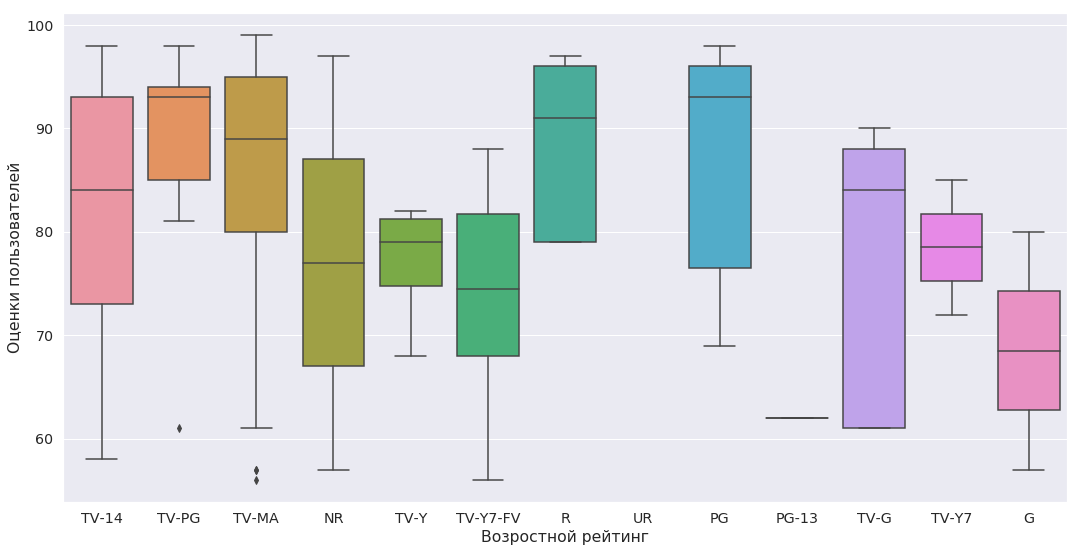

In [104]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='rating', y='user rating score', data=data[data['release year'] > 2012])
plt.xlabel('Возростной рейтинг')
plt.ylabel('Оценки пользователей')
plt.show()

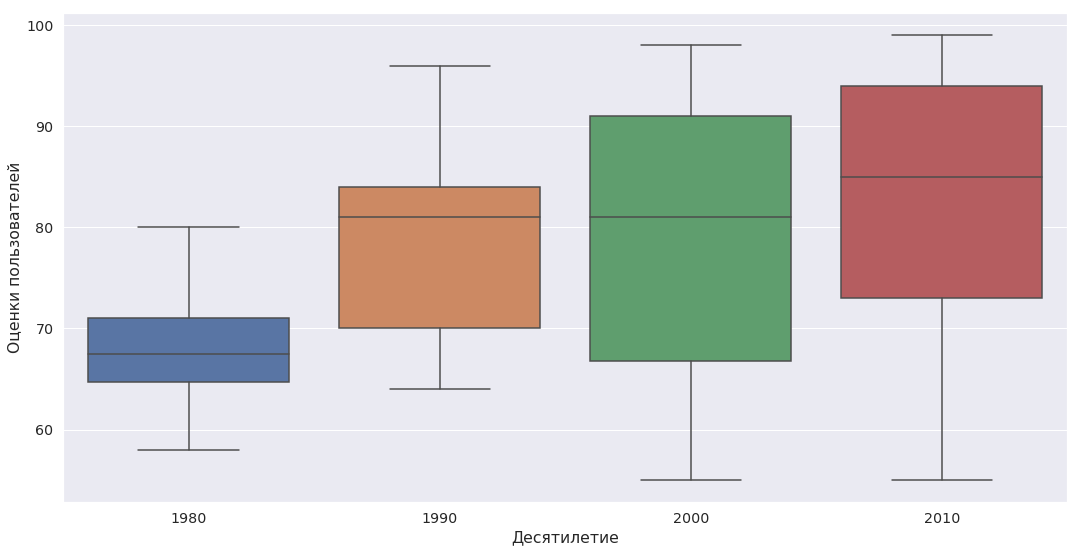

In [105]:
data['decade'] = data['release year'] - (data['release year'] % 10)
plt.figure(figsize=(18, 9))
sns.boxplot(x='decade', y='user rating score', data=data[data['decade'] > 1970])
plt.xlabel('Десятилетие')
plt.ylabel('Оценки пользователей')
plt.show()

**Вывод:** со временем наблюдается рост рейтинга тв-шоу.

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [38]:
import json

with open('./Данные к ДЗ 2/RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category.head()

id              name
0   1  Film & Animation
1   2  Autos & Vehicles
2  10             Music
3  15    Pets & Animals
4  17            Sports

Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [39]:
merged_youtube = pd.merge(youtube_data, category, how='left', left_on='category_id', right_on='id')
del merged_youtube['id']
merged_youtube.head()

trending_date  category_id   views  likes  dislikes  comment_count  \
0             14           22   62408    334       190             50   
1             14           22  330043  43841      2244           2977   
2             14           24  424596  49854       714           2944   
3             14           22  112851   3566       122             80   
4             14           24  243469  36216       631           1692   

             name  
0  People & Blogs  
1  People & Blogs  
2   Entertainment  
3  People & Blogs  
4   Entertainment

Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [40]:
pivot_views = merged_youtube.pivot_table(
    index='name', 
    columns='trending_date', 
    values='views',
    aggfunc=np.sum
)
pivot_views

trending_date                14         15         16          17         18  \
name                                                                           
Autos & Vehicles      1350890.0  2076443.0  2051608.0   1386676.0  1713087.0   
Comedy                2310887.0  4152389.0  4156893.0   3556025.0  3806238.0   
Education              139723.0    28850.0     6963.0    146943.0   256076.0   
Entertainment         5010384.0  5289490.0  3373346.0  12299938.0  7519942.0   
Film & Animation       636616.0   931837.0  1160112.0   1820958.0  2725012.0   
Gaming                 885597.0  1609621.0  1583149.0    557074.0   600307.0   
Howto & Style         2191619.0  1562421.0   129763.0   1250164.0  1468139.0   
Music                  733907.0  1585619.0  4720464.0   9179397.0  6972429.0   
News & Politics       1010044.0  1225112.0  1174092.0   1251367.0  1056007.0   
People & Blogs        4740267.0  4931179.0  4763680.0   5976118.0  5154219.0   
Pets & Animals        2013597.0        NaN   608073.0    541708.0    16179.0   
Science & Technology  2053694.0  6637302.0  6855094.0   2521015.0  8351102.0   
Shows                  951608.0   656799.0   548936.0    609770.0   808860.0   
Sports                 608587.0  1181720.0  1193647.0    577087.0    64261.0   
Travel & Events        104076.0   136549.0     2271.0         NaN   253369.0   

trending_date                19         20         21  
name                                                   
Autos & Vehicles      1736740.0   962761.0  1421017.0  
Comedy                3556578.0  5648120.0  4627423.0  
Education              310830.0   270585.0   186909.0  
Entertainment         5877590.0  8174020.0  4585563.0  
Film & Animation      1075440.0  2574276.0  2532978.0  
Gaming                 193316.0   851814.0   981217.0  
Howto & Style          156958.0  1402284.0   350009.0  
Music                 1329904.0  1527219.0   809274.0  
News & Politics       1028665.0   657263.0  1214178.0  
People & Blogs        4353670.0  4628820.0  6889111.0  
Pets & Animals          12928.0     8792.0   164127.0  
Science & Technology  9396340.0   818570.0   638900.0  
Shows                       NaN   491488.0   164981.0  
Sports                 911646.0   600913.0   722192.0  
Travel & Events        406558.0   186876.0    26321.0

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

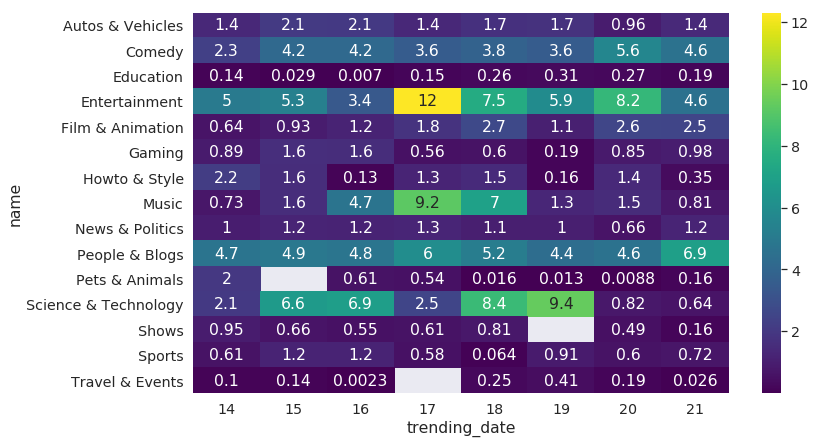

In [106]:
pivot_views 
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(pivot_views / 1e6, annot=True, ax=ax, cmap='viridis')
plt.show()

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [42]:
marg_views = merged_youtube.pivot_table(
    index='name', 
    columns='trending_date', 
    values='views',
    aggfunc=np.sum,
    margins=True,
    margins_name="Всего просмотров"
)
marg_views

trending_date                 14          15          16          17  \
name                                                                   
Autos & Vehicles       1350890.0   2076443.0   2051608.0   1386676.0   
Comedy                 2310887.0   4152389.0   4156893.0   3556025.0   
Education               139723.0     28850.0      6963.0    146943.0   
Entertainment          5010384.0   5289490.0   3373346.0  12299938.0   
Film & Animation        636616.0    931837.0   1160112.0   1820958.0   
Gaming                  885597.0   1609621.0   1583149.0    557074.0   
Howto & Style          2191619.0   1562421.0    129763.0   1250164.0   
Music                   733907.0   1585619.0   4720464.0   9179397.0   
News & Politics        1010044.0   1225112.0   1174092.0   1251367.0   
People & Blogs         4740267.0   4931179.0   4763680.0   5976118.0   
Pets & Animals         2013597.0         NaN    608073.0    541708.0   
Science & Technology   2053694.0   6637302.0   6855094.0   2521015.0   
Shows                   951608.0    656799.0    548936.0    609770.0   
Sports                  608587.0   1181720.0   1193647.0    577087.0   
Travel & Events         104076.0    136549.0      2271.0         NaN   
Всего просмотров      24741496.0  32005331.0  32328091.0  41674240.0   

trending_date                 18          19          20          21  \
name                                                                   
Autos & Vehicles       1713087.0   1736740.0    962761.0   1421017.0   
Comedy                 3806238.0   3556578.0   5648120.0   4627423.0   
Education               256076.0    310830.0    270585.0    186909.0   
Entertainment          7519942.0   5877590.0   8174020.0   4585563.0   
Film & Animation       2725012.0   1075440.0   2574276.0   2532978.0   
Gaming                  600307.0    193316.0    851814.0    981217.0   
Howto & Style          1468139.0    156958.0   1402284.0    350009.0   
Music                  6972429.0   1329904.0   1527219.0    809274.0   
News & Politics        1056007.0   1028665.0    657263.0   1214178.0   
People & Blogs         5154219.0   4353670.0   4628820.0   6889111.0   
Pets & Animals           16179.0     12928.0      8792.0    164127.0   
Science & Technology   8351102.0   9396340.0    818570.0    638900.0   
Shows                   808860.0         NaN    491488.0    164981.0   
Sports                   64261.0    911646.0    600913.0    722192.0   
Travel & Events         253369.0    406558.0    186876.0     26321.0   
Всего просмотров      40765227.0  30347163.0  28803801.0  25314200.0   

trending_date         Всего просмотров  
name                                    
Autos & Vehicles              12699222  
Comedy                        31814553  
Education                      1346879  
Entertainment                 52130273  
Film & Animation              13457229  
Gaming                         7262095  
Howto & Style                  8511357  
Music                         26858213  
News & Politics                8616728  
People & Blogs                41437064  
Pets & Animals                 3365404  
Science & Technology          37272017  
Shows                          4232442  
Sports                         5860053  
Travel & Events                1116020  
Всего просмотров             255979549

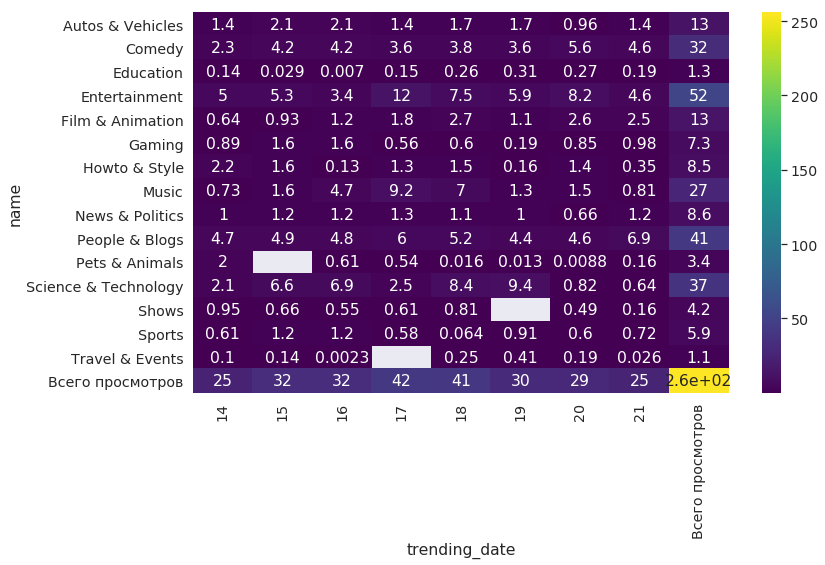

In [107]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(marg_views / 1e6, annot=True, ax=ax, cmap='viridis')
plt.show()

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

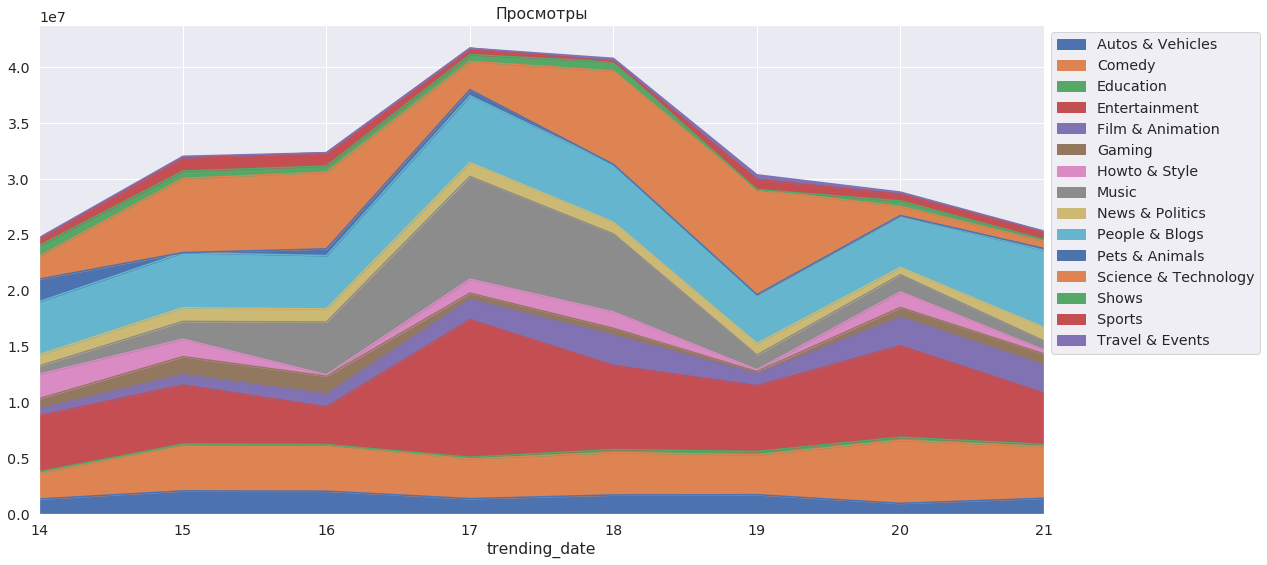

In [108]:
pivot_views.T.plot.area(figsize=(18, 9))
plt.title('Просмотры')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Вывод:** heatmap даёт удобную возможность анализировать таблицы с данными, но при сильном разбросе значений его информативность сильно снижается. 

---

### Задача 5

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

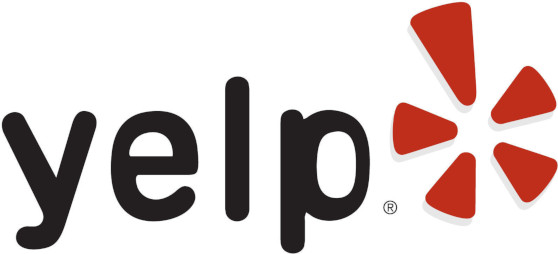

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [45]:
yelp_business = pd.read_csv('Данные к ДЗ 2/yelp_business.csv')
yelp_business.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [46]:
yelp_business.groupby('city', as_index=False).count().\
    sort_values(by='business_id', ascending=False)[['city', 'business_id']].head()

city  business_id
424   Las Vegas        26775
713     Phoenix        17213
983     Toronto        17206
143   Charlotte         8553
871  Scottsdale         8228

Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

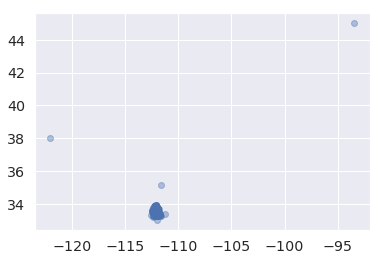

In [47]:
my_choosen_city = yelp_business[yelp_business['city'] == 'Phoenix']
plt.scatter(x=my_choosen_city['longitude'], y=my_choosen_city['latitude'], alpha=0.4)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

Попробуйте также автоматически подгружать карту города в качестве фона графика. <a href="https://plotly.com/python/scattermapbox/">Примеры.</a>

In [48]:
my_choosen_city = \
    my_choosen_city[(my_choosen_city['latitude'] < 33.7) & (my_choosen_city['latitude'] > 33.4) & 
                    (my_choosen_city['longitude'] < -111.95) & (my_choosen_city['longitude'] > -112.15)]

my_choosen_city.head()

Unnamed: 0             business_id  \
2            2  KQPW8lFf1y5BT2MxiSZ3QA   
22          22  7YIy1tXOor9VCwvaSjuBHg   
31          31  zzMu-6SmqhpvHxVRM6tx9g   
45          45  rDMptJYWtnMhpQu_rRXHng   
46          46  1WBkAuQg81kokZIPMpn9Zg   

                                                 name neighborhood  \
2                             "Western Motor Vehicle"          NaN   
22  "TSA Checkpoint T-4 A - Phoenix Sky Harbor Int...          NaN   
31                           "Good Brakes Automotive"          NaN   
45                                       "McDonald's"          NaN   
46                     "Charr An American Burger Bar"          NaN   

                             address     city state postal_code   latitude  \
2           "6025 N 27th Ave, Ste 1"  Phoenix    AZ       85017  33.524903   
22          "3400 E Sky Harbor Blvd"  Phoenix    AZ       85034  33.435463   
31  "12614 N Cave Creek Rd, Ste 104"  Phoenix    AZ       85022  33.600877   
45            "719 E Thunderbird Rd"  Phoenix    AZ       85022  33.607070   
46   "777 E Thunderbird Rd, Ste 107"  Phoenix    AZ       85022  33.607310   

     longitude  is_open                                         categories  
2  -112.115310        1  Departments of Motor Vehicles;Public Services ...  
22 -112.006989        1                       Public Services & Government  
31 -112.037685        1  Oil Change Stations;Smog Check Stations;Automo...  
45 -112.064382        1                      Fast Food;Burgers;Restaurants  
46 -112.063404        1                                Burgers;Restaurants

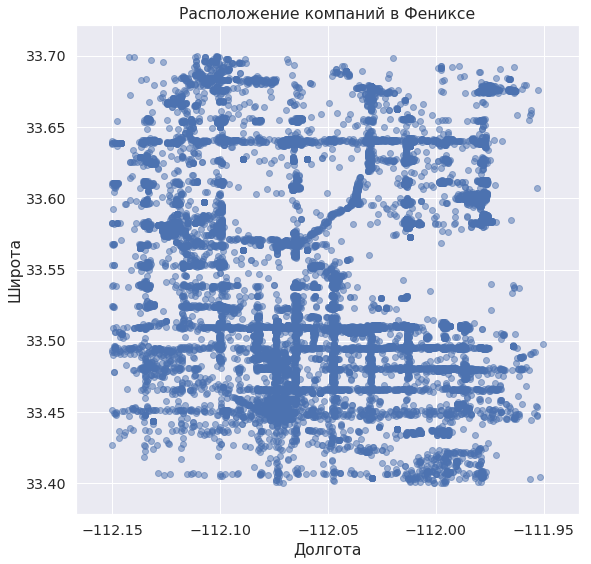

In [120]:
plt.figure(figsize=(9, 9))
plt.scatter(y=my_choosen_city['latitude'], x=my_choosen_city['longitude'], alpha=0.5)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Расположение компаний в Фениксе')
plt.show()

Вариант с использованием mapbox.

In [50]:
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(my_choosen_city, lat="latitude", lon="longitude", text='name', opacity=0.5)
fig.show()

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [51]:
yelp_review = pd.read_csv('Данные к ДЗ 2/yelp_review.csv')
yelp_review.head()

Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города N. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [52]:
choosen_review = yelp_review.set_index('business_id').loc[my_choosen_city['business_id']].reset_index()
choosen_review.head()

business_id  Unnamed: 0  stars
0  KQPW8lFf1y5BT2MxiSZ3QA       69461      1
1  KQPW8lFf1y5BT2MxiSZ3QA      428464      4
2  KQPW8lFf1y5BT2MxiSZ3QA      678989      1
3  KQPW8lFf1y5BT2MxiSZ3QA     1025655      1
4  KQPW8lFf1y5BT2MxiSZ3QA     1304143      1

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [53]:
del choosen_review['Unnamed: 0']
choosen_review = choosen_review.groupby(by='business_id').aggregate([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [54]:
choosen_review.columns = np.array(['average_score', 'count'])
choosen_review.head()

average_score  count
business_id                                 
--g-a85VwrdZJNf0R95GcQ       4.458333     24
--orEUqwTzz5QKbmyYbAWw       2.333333      3
--phjqoPSPa8sLmUVNby9w       4.333333      9
-000aQFeK6tqVLndf7xORg       5.000000      9
-050d_XIor1NpCuWkbIVaQ       3.987143    700

Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [55]:
my_choosen_city = my_choosen_city.set_index('business_id').join(choosen_review)[
    ['latitude', 'longitude', 'categories', 'name', 'average_score', 'count']]


In [56]:
my_choosen_city.head()

latitude   longitude  \
business_id                                     
KQPW8lFf1y5BT2MxiSZ3QA  33.524903 -112.115310   
7YIy1tXOor9VCwvaSjuBHg  33.435463 -112.006989   
zzMu-6SmqhpvHxVRM6tx9g  33.600877 -112.037685   
rDMptJYWtnMhpQu_rRXHng  33.607070 -112.064382   
1WBkAuQg81kokZIPMpn9Zg  33.607310 -112.063404   

                                                               categories  \
business_id                                                                 
KQPW8lFf1y5BT2MxiSZ3QA  Departments of Motor Vehicles;Public Services ...   
7YIy1tXOor9VCwvaSjuBHg                       Public Services & Government   
zzMu-6SmqhpvHxVRM6tx9g  Oil Change Stations;Smog Check Stations;Automo...   
rDMptJYWtnMhpQu_rRXHng                      Fast Food;Burgers;Restaurants   
1WBkAuQg81kokZIPMpn9Zg                                Burgers;Restaurants   

                                                                     name  \
business_id                                                                 
KQPW8lFf1y5BT2MxiSZ3QA                            "Western Motor Vehicle"   
7YIy1tXOor9VCwvaSjuBHg  "TSA Checkpoint T-4 A - Phoenix Sky Harbor Int...   
zzMu-6SmqhpvHxVRM6tx9g                           "Good Brakes Automotive"   
rDMptJYWtnMhpQu_rRXHng                                       "McDonald's"   
1WBkAuQg81kokZIPMpn9Zg                     "Charr An American Burger Bar"   

                        average_score  count  
business_id                                   
KQPW8lFf1y5BT2MxiSZ3QA       1.666667     18  
7YIy1tXOor9VCwvaSjuBHg       1.391304     46  
zzMu-6SmqhpvHxVRM6tx9g       4.200000      5  
rDMptJYWtnMhpQu_rRXHng       1.090909     11  
1WBkAuQg81kokZIPMpn9Zg       3.155172    232

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

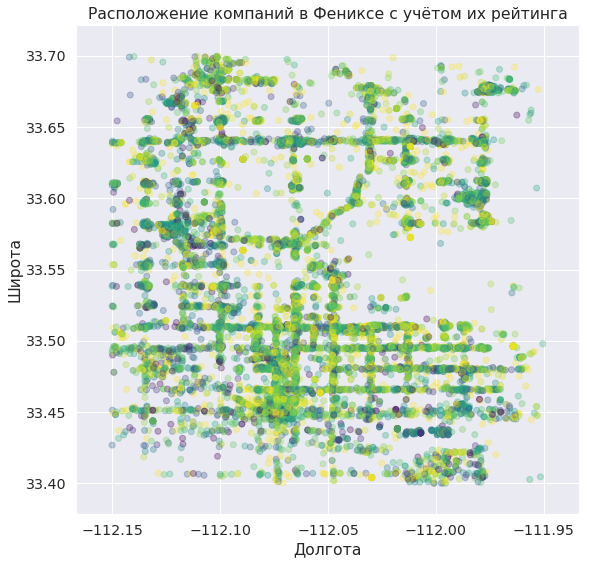

In [121]:
plt.figure(figsize=(9, 9))
plt.scatter(
    y=my_choosen_city['latitude'], 
    x=my_choosen_city['longitude'], 
    c=my_choosen_city['average_score'], 
    cmap="viridis", 
    alpha=0.3
)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Расположение компаний в Фениксе с учётом их рейтинга')
plt.show()

Вариант с использованием mapbox.

In [58]:
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(my_choosen_city, lat="latitude", lon="longitude", color='average_score', opacity=0.3)
fig.show()

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [59]:
my_choosen_city['long_area'] = np.round(my_choosen_city['longitude']*4, decimals=1)*0.25
my_choosen_city['lat_area'] = np.round(my_choosen_city['latitude']*4, decimals=1)*0.25

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [60]:
pivot_score = my_choosen_city.pivot_table(
    index='lat_area', 
    columns='long_area', 
    values='average_score',
    aggfunc=np.average
)
pivot_score

long_area  -112.150  -112.125  -112.100  -112.075  -112.050  -112.025  \
lat_area                                                                
33.400          NaN  3.961905  3.491024  3.668332  3.834974  3.695455   
33.425     3.061040  3.048167  3.071265  3.630974  3.488327  3.442738   
33.450     3.716782  3.396212  3.678508  3.716588  3.696891  3.276051   
33.475     3.830529  3.564973  3.345701  3.786302  3.793713  3.758015   
33.500     3.907579  3.358354  3.597799  3.786631  3.682095  3.901431   
33.525     3.608184  3.426118  3.364609  4.049139  4.063989  3.884334   
33.550     3.098580  3.581893  3.436720  3.758181  3.786863  4.392864   
33.575     3.487188  3.228282  3.697431  3.748546  4.095445  4.033235   
33.600     3.304419  3.453293  3.793744  3.883268  3.973175  3.867979   
33.625     4.396970  3.733876  4.049513  3.991403  4.260183  3.910007   
33.650     3.897120  3.466635  3.491797  3.433655  3.646371  3.713397   
33.675     2.000000  3.332404  3.960215  3.944534  3.689899  3.953682   
33.700     3.083333  3.405556  3.877343  3.844444  4.099752  4.954545   

long_area  -112.000  -111.975  -111.950  
lat_area                                 
33.400     3.753094  2.917460  3.633333  
33.425     3.113129  3.314806       NaN  
33.450     3.453842  3.271400  4.369486  
33.475     3.568518  3.610512  4.193174  
33.500     4.072331  4.080838  4.009108  
33.525     3.759231  4.053295  4.300000  
33.550          NaN  4.375000       NaN  
33.575     3.956897  3.825396       NaN  
33.600     3.743551  3.606592  3.482759  
33.625     4.077327  3.827369       NaN  
33.650     3.490252  3.484275  3.695249  
33.675     3.790043  3.648989  3.566667  
33.700     3.990544  4.175000       NaN

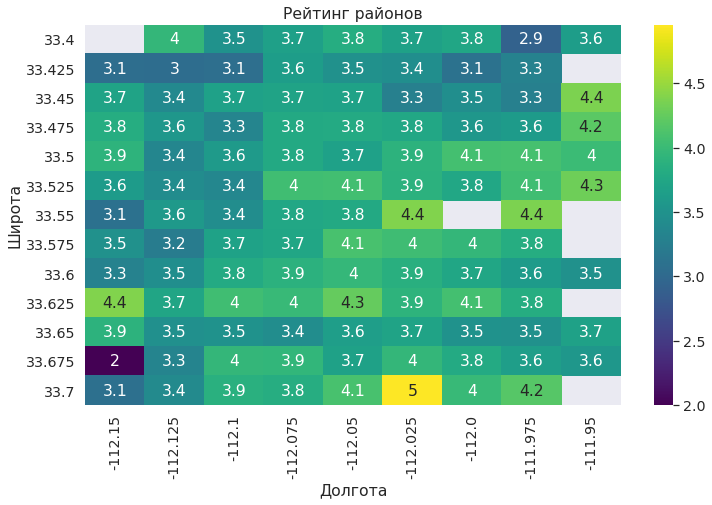

In [116]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(pivot_score, annot=True, ax=ax, cmap="viridis")
plt.title('Рейтинг районов')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 
* Вполне может оказаться, что в районе всего пара компаний и судить об среднем значении оценки не имеет смысла. 
* При не сильно отличающихся оценках может сложиться впечатление, что один район сильно хуже другого.  

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

Отбор и построение сводной таблицы компаний удовлетворяющих условиям.

In [62]:
more_30_scores = my_choosen_city.pivot_table(
    index='lat_area', 
    columns='long_area', 
    values='average_score',
    aggfunc=np.size, 
) >= 30

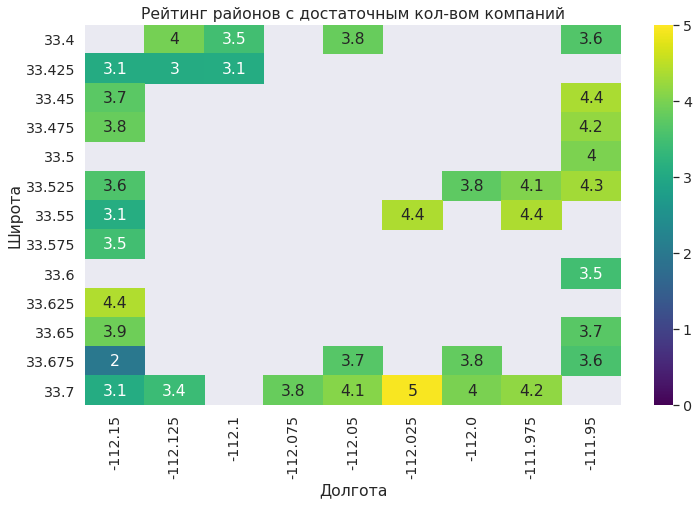

In [115]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(pivot_score, annot=True, ax=ax, cmap="viridis", vmin=0, vmax=5, mask=more_30_scores)
plt.title('Рейтинг районов с достаточным кол-вом компаний')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** теперь heatmap даёт более правдивые данные, так как мы легко различаем оценки и можем судить только о раонах с достаточным количеством отзывов.   

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [64]:
mask = (my_choosen_city['categories'].apply(lambda x: x.find('Restaurant') != -1) &
        (my_choosen_city['count'] >= 5))
restaurants = my_choosen_city[mask]
restaurants.head()

latitude   longitude  \
business_id                                     
rDMptJYWtnMhpQu_rRXHng  33.607070 -112.064382   
1WBkAuQg81kokZIPMpn9Zg  33.607310 -112.063404   
iPa__LOhse-hobC2Xmp-Kw  33.508765 -112.046240   
5XejqzaFmtkZMstJS5Iy-w  33.480301 -112.080586   
2v-8QQfMLX2PCz-0S6gISQ  33.552870 -112.133712   

                                                               categories  \
business_id                                                                 
rDMptJYWtnMhpQu_rRXHng                      Fast Food;Burgers;Restaurants   
1WBkAuQg81kokZIPMpn9Zg                                Burgers;Restaurants   
iPa__LOhse-hobC2Xmp-Kw                      Restaurants;Burgers;Fast Food   
5XejqzaFmtkZMstJS5Iy-w  Vegan;American (New);Restaurants;Sandwiches;Sa...   
2v-8QQfMLX2PCz-0S6gISQ                        Pizza;Restaurants;Fast Food   

                                                  name  average_score  count  \
business_id                                                                    
rDMptJYWtnMhpQu_rRXHng                    "McDonald's"       1.090909     11   
1WBkAuQg81kokZIPMpn9Zg  "Charr An American Burger Bar"       3.155172    232   
iPa__LOhse-hobC2Xmp-Kw                    "McDonald's"       2.764706     34   
5XejqzaFmtkZMstJS5Iy-w                   "D'Lish Cafe"       3.837838     37   
2v-8QQfMLX2PCz-0S6gISQ             "Papa John's Pizza"       2.428571      7   

                        long_area  lat_area  
business_id                                  
rDMptJYWtnMhpQu_rRXHng   -112.075    33.600  
1WBkAuQg81kokZIPMpn9Zg   -112.075    33.600  
iPa__LOhse-hobC2Xmp-Kw   -112.050    33.500  
5XejqzaFmtkZMstJS5Iy-w   -112.075    33.475  
2v-8QQfMLX2PCz-0S6gISQ   -112.125    33.550

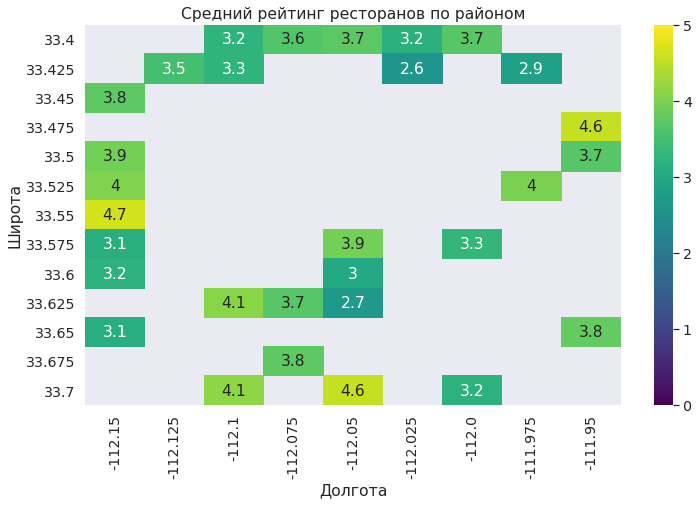

In [118]:
pivot_restaurants = restaurants.pivot_table(
    index='lat_area', 
    columns='long_area', 
    values='average_score',
    aggfunc=np.average, 
)

more_10_restaurants = restaurants.pivot_table(
    index='lat_area', 
    columns='long_area', 
    values='name',
    aggfunc=np.size, 
) >= 10

sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(pivot_restaurants, annot=True, ax=ax, cmap="viridis", vmin=0, vmax=5, mask=more_10_restaurants)
plt.title('Средний рейтинг ресторанов по районом')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** 
* Пара отзывов не даёт реального представления об оценке.
* Аналогично, отзывы об паре ресторнов в районе ничего не говорят о районе в целом.

Кот Василий очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [66]:
top_rest = restaurants[restaurants['count'] >= 50].sort_values(by='average_score', ascending=False).\
    reset_index()[
        ['name', 'average_score', 'count', 'latitude', 'longitude', 'categories']
]
top_rest.head(10)

name  average_score  count   latitude  \
0                 "City Square Deli & Grill"       4.867470     83  33.691904   
1                              "Saffron JAK"       4.840000    100  33.656123   
2               "Kiss Pollos Estilo Sinaloa"       4.833333     90  33.436169   
3                          "Little Miss BBQ"       4.795904   1465  33.421808   
4                 "Habbouz Tunisian Cuisine"       4.793103     58  33.551734   
5              "Oliver's Sophisticated Bean"       4.787234     94  33.458445   
6                 "Lucky's Burgers & Shakes"       4.759036     83  33.612328   
7                        "Lupita's Hot Dogs"       4.756757     74  33.637837   
8  "Ten Handcrafted American Fare & Spirits"       4.740576    451  33.508555   
9                         "Sammiches Bistro"       4.719388    196  33.626378   

    longitude                                         categories  
0 -112.098834  Sandwiches;Restaurants;Burgers;Breakfast & Bru...  
1 -112.062959  Persian/Iranian;Food Trucks;Bakeries;Food;Rest...  
2 -112.077588  Restaurants;Mexican;Chicken Shop;Salad;Tacos;A...  
3 -111.989174                               Restaurants;Barbeque  
4 -112.116998                          Mediterranean;Restaurants  
5 -112.069474  Vegetarian;Restaurants;Vegan;Cafes;Food;Coffee...  
6 -112.099276  Fast Food;American (Traditional);Restaurants;B...  
7 -112.013671                   Restaurants;Hot Dogs;Food Stands  
8 -112.027138  Nightlife;Restaurants;American (Traditional);A...  
9 -112.100217  Burgers;Food;Specialty Food;Sandwiches;Restaur...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [67]:
top_rest = top_rest[top_rest['average_score'] >= 4.7]
top_rest['color'] = [1 if x < 10 else 0 for x in top_rest.index]

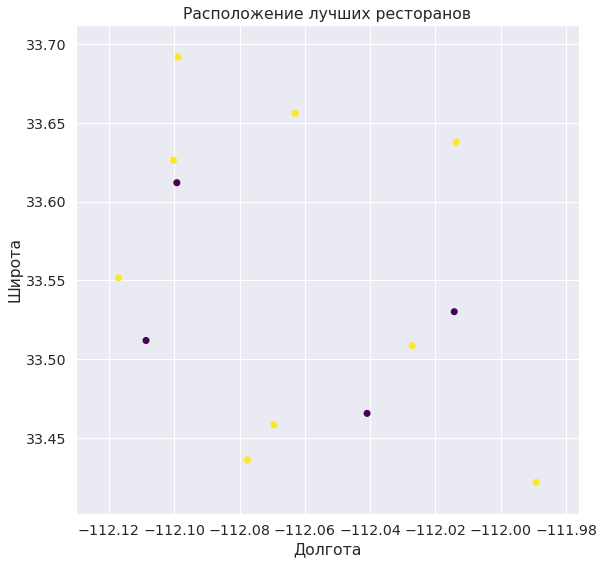

In [122]:
plt.figure(figsize=(9, 9))
plt.scatter(y=top_rest['latitude'], x=top_rest['longitude'], c=top_rest['color'], cmap="viridis")
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Расположение лучших ресторанов')
plt.show()

Вариант с использованием mapbox.

In [69]:
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(top_rest, lat="latitude", lon="longitude", text='name', color='color')
fig.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** кот Василий определённо любит хорошее качество услуг и не доверяет всему, что первым делом попадается. Задача похоже на создание рекомендательной системы для пользователей с разными предпочтениями. 